In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import exp,log,argmax,argmin,ones,zeros,cos,sin,sqrt,dot
from scipy.stats import norm
import scipy.linalg as la
import time
from scipy.special import gamma as Gamma

In [2]:
H=0.75
sigma=0.3
r=0.03
T=0.25
K=40

In [3]:
#finite difference method
def fd2_bvp(n,a,c,alpha,beta,gamma,alpha1,beta1,gamma1,alpha2,beta2,gamma2,f):
    h=(c-a)/n
    A=zeros((n+1,n+1))
    A[0][0]=2*h*alpha1-3*beta1
    A[0][1]=4*beta1
    A[0][2]=-beta1
    A[n][n-2]=beta2
    A[n][n-1]=-4*beta2
    A[n][n]=2*h*alpha2+3*beta2
    b=ones(n+1)
    b[0]=2*gamma1*h
    b[n]=2*h*gamma2
    for i in range(1,n):
        A[i][i-1]=2*gamma-beta*h
        A[i][i]=2*h*h*alpha-4*gamma
        A[i][i+1]=beta*h+2*gamma
        b[i]=2*h*h*f[i]
    (P,L,U)=la.lu(A)
    b=dot(b,P)
    y=ones(n+1)
    y[0]=b[0]
    for i in range(1,n+1):
        for j in range(0,i):
            b[i]-=L[i][j]*y[j]
        y[i]=b[i]
    solu=ones(n+1)
    solu[n]=y[n]/U[n][n]
    for i in range(n-1,-1,-1):
        for j in range(i+1,n+1):
            y[i]-=U[i][j]*solu[j]
        solu[i]=y[i]/U[i][i]

    return solu

In [4]:
# this function returns a value for fractional pde at time t(n-1), tomorrow
def fractional_be(N,M,r,T,alpha,xm,sigma,k):  
    x=np.arange(-xm, xm+xm/N, 2*xm/N)
    v=np.array([k*exp(x[i])-k if k*exp(x[i])-k>0 else 0 for i in range(len(x))])
    h=(T-0)/M
    v_list=[v]
    for j in range(1,M):
        t=j*h
        lambda1=Gamma(1+alpha)  
        lambda2=((T-t)**(1-alpha))/(Gamma(2-alpha))
        lambda3=((T-t)**(1-alpha))*(t**(alpha-1))
        D=(sigma*sigma/2)*lambda1
        E=(lambda2*r-lambda1*sigma*sigma/2)
        F=-r*lambda2-rho(h,alpha)*lambda3
        gamma2=k*(-exp(-r*t)+exp(xm))
        v=fd2_bvp(N,-xm,xm,F,E,D,1,0,0,1,0,gamma2,lambda3*v_cumulated(v_list,h,alpha))
        v_list+=[np.array(v)]
#     return (v_list[0],v_list[1],v_list[2])
    return v
def w(j,alpha):
    return (j+1)**(1-alpha)-j**(1-alpha)
def rho(h,alpha):
    return 1/(Gamma(2-alpha)*(h**alpha))
def v_cumulated(v_list,h,alpha):
    idx_n=len(v_list)
    result=-rho(h,alpha)*(w(idx_n-1,alpha)*v_list[0])
    for j in range(1,idx_n):
        result+=rho(h,alpha)*(w(idx_n-j,alpha)-w(idx_n-1-j,alpha))*v_list[j]
    return result 

In [5]:
def fdm_be(N,M,r,T,H,xm,sigma,k):
    x=np.arange(-xm,xm+xm/N,2*xm/N)
    v=np.array([k*exp(x[i])-k if k*exp(x[i])-k>0 else 0 for i in range(len(x))])
    h=(T-0)/M
    F=-r
    sigma_H=sigma*sigma*H*h**(2*H-1)
    param=2*H-1
    v_list=[v]
    for j in range(1,M+1):
        D=sigma_H*j**param
        E=r-sigma_H*j**param
        gamma2=k*(-exp(-r*j*h)+exp(xm))
        v=fd2_bvp(N,-xm,xm,1-h*F,-h*E,-h*D,1,0,0,1,0,gamma2,v)
        v_list+=[v]
    return [v_list[-2],v]

In [6]:
# all these _list functions return a list of v over time t instead of the final step
def fractional_be_list(N,M,r,T,alpha,xm,sigma,k):  
    x=np.arange(-xm, xm+xm/N, 2*xm/N)
    v=np.array([k*exp(x[i])-k if k*exp(x[i])-k>0 else 0 for i in range(len(x))])
    h=(T-0)/M
    v_list=[v]
    for j in range(1,M):
        t=j*h
        lambda1=Gamma(1+alpha)  
        lambda2=((T-t)**(1-alpha))/(Gamma(2-alpha))
        lambda3=((T-t)**(1-alpha))*(t**(alpha-1))
        D=(sigma*sigma/2)*lambda1
        E=(lambda2*r-lambda1*sigma*sigma/2)
        F=-r*lambda2-rho(h,alpha)*lambda3
        gamma2=k*(-exp(-r*t)+exp(xm))
        v=fd2_bvp(N,-xm,xm,F,E,D,1,0,0,1,0,gamma2,lambda3*v_cumulated(v_list,h,alpha))
        v_list+=[np.array(v)]
    return v_list

def fdm_be_list(N,M,r,T,H,xm,sigma,k):
    x=np.arange(-xm,xm+xm/N,2*xm/N)
    v=np.array([k*exp(x[i])-k if k*exp(x[i])-k>0 else 0 for i in range(len(x))])
    h=(T-0)/M
    F=-r
    sigma_H=sigma*sigma*H*h**(2*H-1)
    param=2*H-1
    v_list=[v]
    for j in range(1,M+1):
        D=sigma_H*j**param
        E=r-sigma_H*j**param
        gamma2=k*(-exp(-r*j*h)+exp(xm))
        v=fd2_bvp(N,-xm,xm,1-h*F,-h*E,-h*D,1,0,0,1,0,gamma2,v)
        v_list+=[v]
    return v_list


In [7]:
def call_option_explicit(r,T,H,s0,sigma,strike):
    T_H=T**(H)                                        #some important parameters
    d1=(log(s0/strike)+r*T+1/2*sigma*sigma*T_H*T_H)/(sigma*T_H)
    d2=d1-sigma*T_H
    return s0*norm.cdf(d1)-strike*exp(-r*T)*norm.cdf(d2)

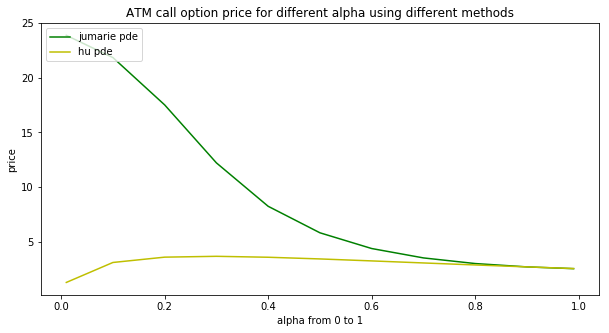

In [14]:
fractional_list_tmr=[]
fdm_list_tmr=[]
fdm_list_td=[]
for alpha in [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]:     
    fractional_list_tmr+=[fractional_be_today(200,200,0.03,0.25,alpha,1.5,0.3,40)[100]]

    fdm_list_td+=[fdm_be(200,200,0.03,0.25,alpha/2,1.5,0.3,40)[1][100]]
plt.figure(figsize=(10,5))
title="ATM call option price for different alpha using different methods"
plt.title(title)
plt.plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],fractional_list_tmr,label='jumarie pde',color='g')
plt.plot([0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],fdm_list_td,label='hu pde',color='y')
plt.legend(loc='upper left')
plt.ylabel('price')
plt.xlabel('alpha from 0 to 1')
plt.show()

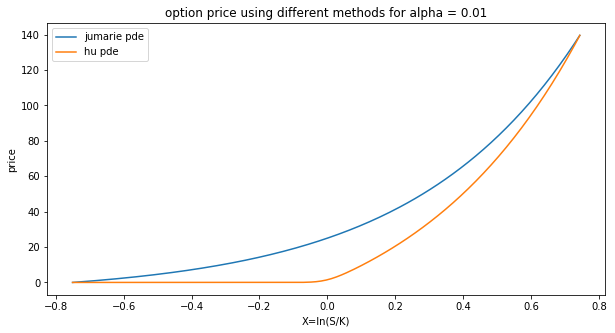

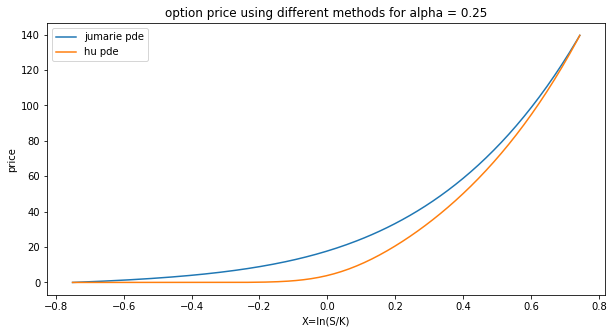

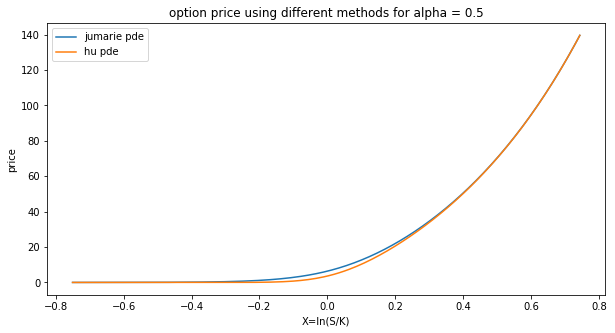

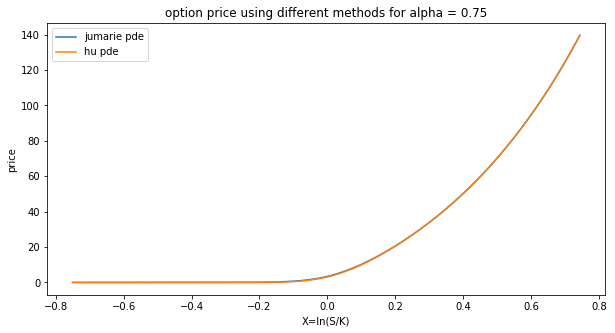

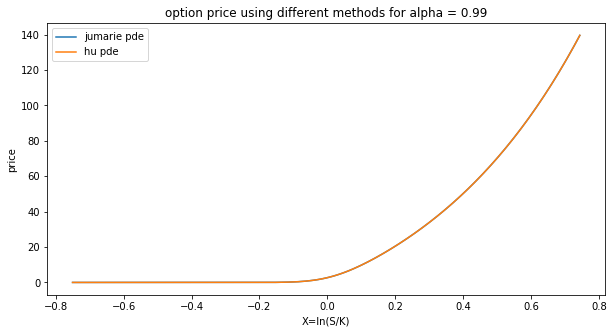

In [15]:
fractional_list_tmr=[]
fdm_list_tmr=[]
fdm_list_td=[]
list_len=len(fractional_be_today(200,200,0.03,0.25,alpha,1.5,0.3,40))
x_list=[t*(T/list_len) for t in range(list_len)]
for alpha in [0.01,0.25,0.5,0.75,0.99]:     
    fractional_list=fractional_be_today(200,500,0.03,0.25,alpha,1.5,0.3,40)
    fdm_list_td=fdm_be(200,500,0.03,0.25,alpha/2,1.5,0.3,40)[1]
    list_len=len(fdm_list_td)
    x_list=[(t-list_len/2)*(1.5/list_len) for t in range(list_len)]
    plt.figure(figsize=(10,5))
    title="option price using different methods for alpha = "+str(alpha)
    plt.title(title)
    plt.plot(x_list,fractional_list,label='jumarie pde')
    plt.plot(x_list,fdm_list_td,label='hu pde')
    plt.legend(loc='upper left')
    plt.ylabel('price')
    plt.xlabel('X=ln(S/K)')
plt.show()

In [ ]:
# as t goes, we want to investigate how the price of ATM calls change in different method, take alpha=0.75 in our case

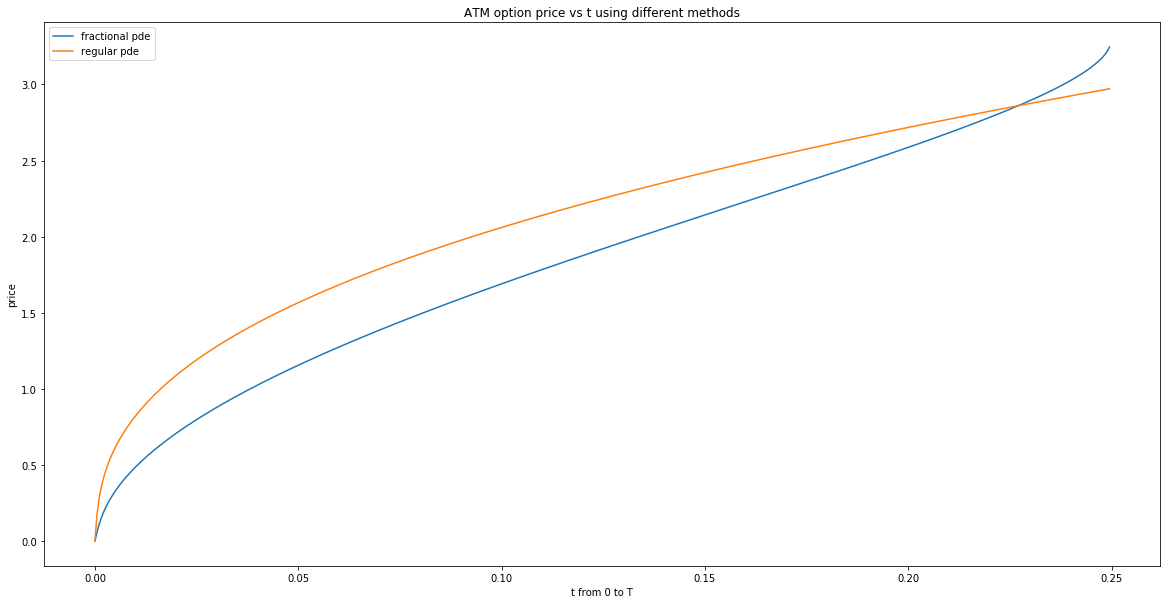

In [9]:
fbe_list=fractional_be_list(200,500,0.03,0.25,0.75,1.5,0.3,40)
fdm_list=fdm_be_list(200,500,0.03,0.25,0.75/2,1.5,0.3,40)
ATM_fbe=[]
ATM_fdm=[]
list_len=min(len(fbe_list),len(fdm_list))
for i in range(list_len):
    ATM_fbe+=[fbe_list[i][100]]
    ATM_fdm+=[fdm_list[i][100]]
plt.figure(figsize=(20,10))
title="ATM option price vs t using different methods"
plt.title(title)
x_list=[t*(T/list_len) for t in range(list_len)]
plt.plot(x_list,ATM_fbe,label='fractional pde')
plt.plot(x_list,ATM_fdm,label='regular pde')
plt.ylabel('price')
plt.xlabel('t from 0 to T')   
plt.legend(loc='upper left') 
plt.show()



In [ ]:
# time complexity

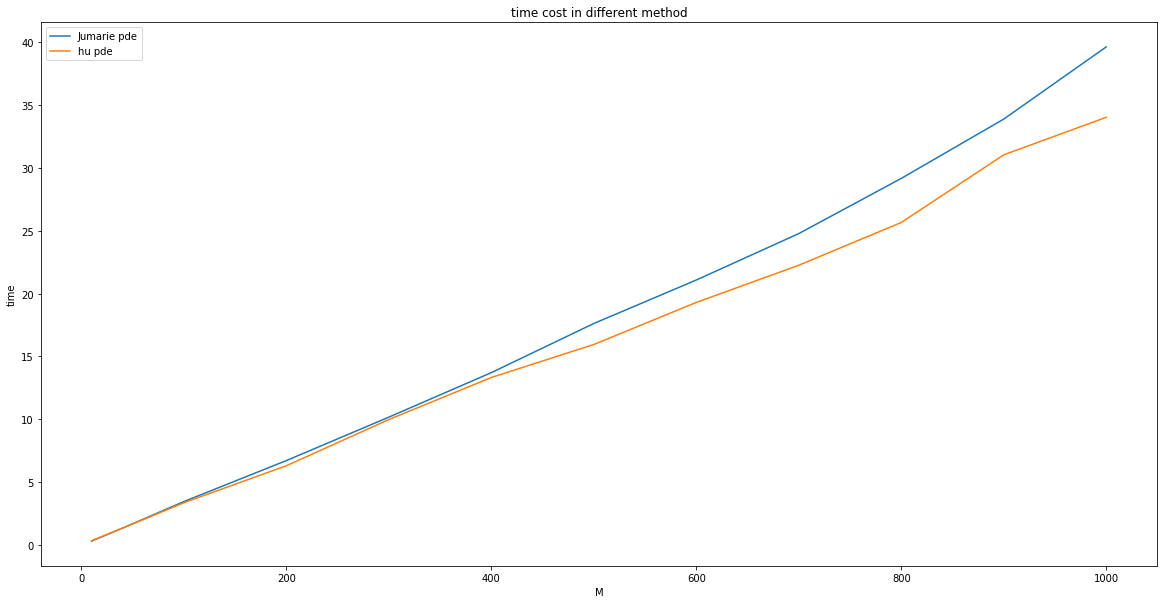

In [16]:
fbe_timelist=[]
fdm_timelist=[]
x_list=[10,50,100,200,300,400,500,600,700,800,900,1000]
for M in x_list:
    start_time=time.time()
    fractional_be(200,M,0.03,0.25,0.75,1.5,0.3,40)
    fbe_timelist+=[time.time()-start_time]
    start_time=time.time()
    fdm_be(200,M,0.03,0.25,0.75/2,1.5,0.3,40)
    fdm_timelist+=[time.time()-start_time]

plt.figure(figsize=(20,10))
title="time cost in different method"
plt.title(title)

plt.plot(x_list,fbe_timelist,label='Jumarie pde')
plt.plot(x_list,fdm_timelist,label='hu pde')
plt.ylabel('time')
plt.xlabel('M')   
plt.legend(loc='upper left') 
plt.show()

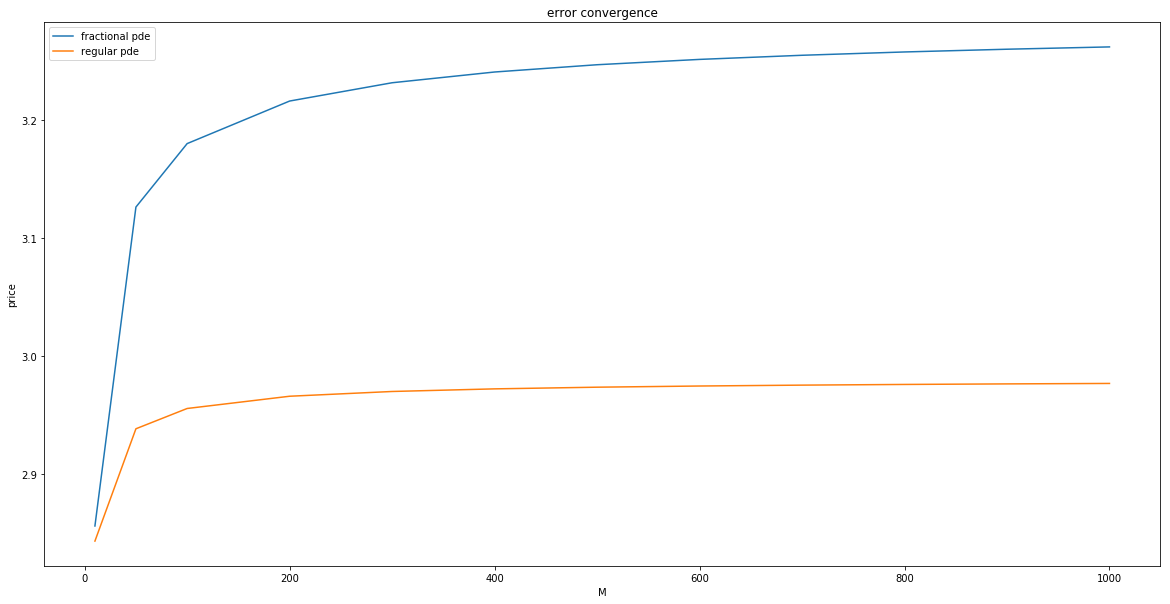

In [12]:
x_list=[10,50,100,200,300,400,500,600,700,800,900,1000]
ATM_fbe=[]
ATM_fdm=[]
for M in x_list:
    ATM_fbe+=[fractional_be(200,M,0.03,0.25,0.75,1.5,0.3,40)[100]]
    ATM_fdm+=[fdm_be(200,M,0.03,0.25,0.75/2,1.5,0.3,40)[1][100]]
plt.figure(figsize=(20,10))
title="error convergence"
plt.title(title)
plt.plot(x_list,ATM_fbe,label='fractional pde')
plt.plot(x_list,ATM_fdm,label='regular pde')
plt.ylabel('price')
plt.xlabel('M')   
plt.legend(loc='upper left') 
plt.show()    

In [8]:
# This funciton follows prof Chen's instruction to get the today's price for Jumarie's formula
def fractional_be_today(N,M,r,T,alpha,xm,sigma,k):  
    x=np.arange(-xm, xm+xm/N, 2*xm/N)
    v=np.array([k*exp(x[i])-k if k*exp(x[i])-k>0 else 0 for i in range(len(x))])
    h=(T-0)/M
    v_list=[v]
    for j in range(1,M):
        t=j*h
        lambda1=Gamma(1+alpha)  
        lambda2=((T-t)**(1-alpha))/(Gamma(2-alpha))
        lambda3=((T-t)**(1-alpha))*(t**(alpha-1))
        D=(sigma*sigma/2)*lambda1
        E=(lambda2*r-lambda1*sigma*sigma/2)
        F=-r*lambda2-rho(h,alpha)*lambda3
        gamma2=k*(-exp(-r*t)+exp(xm))
        v=fd2_bvp(N,-xm,xm,F,E,D,1,0,0,1,0,gamma2,lambda3*v_cumulated(v_list,h,alpha))
        v_list+=[np.array(v)]
    v=v+(h**(1-alpha))*((T-h)**(alpha-1))*v_cumulated_today(v_list,h,alpha)
    return v

def v_cumulated_today(v_list,h,alpha):
    idx_n=len(v_list)
    result=-(w(idx_n-1,alpha)*v_list[0])+w(0,alpha)*v_list[-1]
    for j in range(1,idx_n):
        result+=(w(idx_n-j,alpha)-w(idx_n-1-j,alpha))*v_list[j]
    return result 



In [37]:
# Using the method from prof chen, the result for the price today
# and tomorrow is very close
print(fractional_be_today(200,200,0.03,0.25,0.75,1.5,0.3,40)[100])
print(fractional_be(200,200,0.03,0.25,0.75,1.5,0.3,40)[100])

3.2291129753887775
3.215646820294633


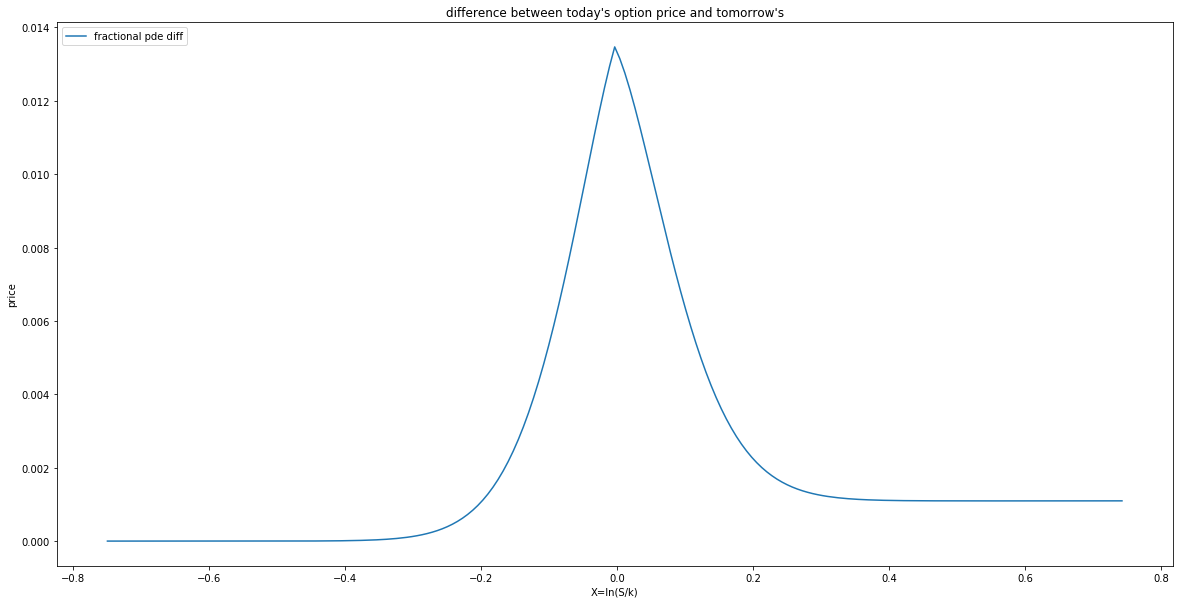

In [39]:
# Using the same method on fractional pde, the option price difference between today and tomorrow
price_diff=fractional_be_today(200,200,0.03,0.25,0.75,1.5,0.3,40)-fractional_be(200,200,0.03,0.25,0.75,1.5,0.3,40)
plt.figure(figsize=(20,10))
title="difference between today's option price and tomorrow's"
plt.title(title)
list_len=len(price_diff)
x_list=[(t-list_len/2)*(1.5/list_len) for t in range(list_len)]
plt.plot(x_list,price_diff,label='fractional pde diff')
plt.ylabel('price')
plt.xlabel('X=ln(S/k)')   
plt.legend(loc='upper left') 
plt.show()    


In [29]:
error=[]
for i in range(100):
    alpha=0.01*i
    fdm_j=fractional_be_today(100,100,0.03,0.25,alpha,0.5,0.3,40)[50]
    fdm_o=fdm_be(100,100,0.03,0.25,alpha/2,0.5,0.3,40)[1][50]
    error.append(abs(fdm_j-fdm_o)/fdm_o)

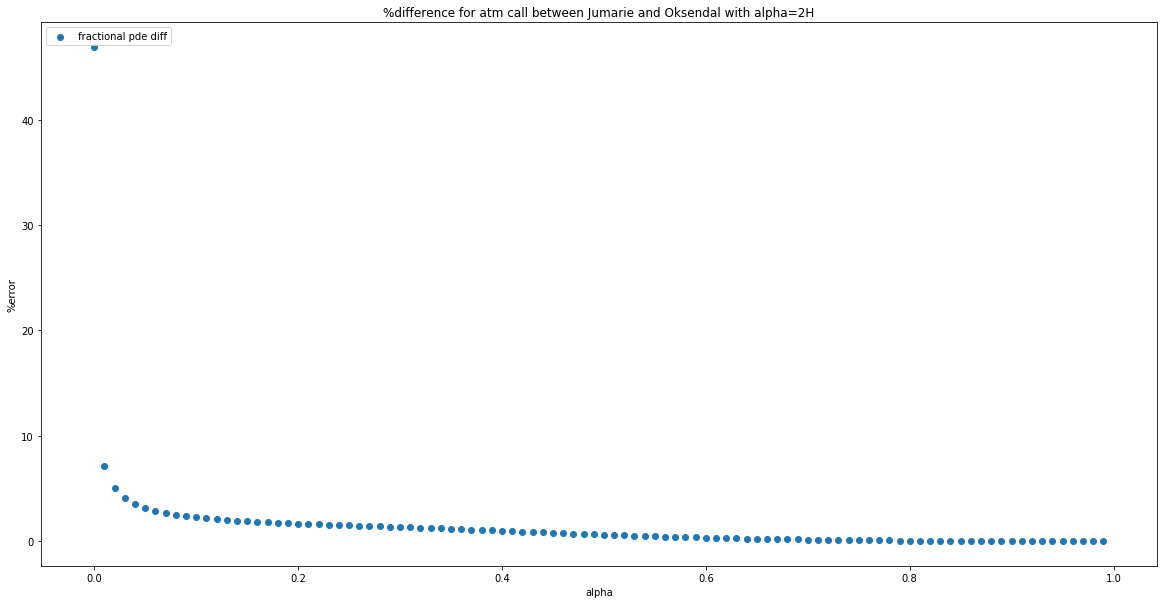

In [30]:
#when we set alpha=2*H  and compare error at this time
plt.figure(figsize=(20,10))
title="%difference for atm call between Jumarie and Oksendal with alpha=2H"
plt.title(title)
x_list=[0.01*i for i in range(100)]
plt.scatter(x_list,error,label='fractional pde diff')
#plt.ylim(0, 0.003)
plt.ylabel('%error')
plt.xlabel('alpha')   
plt.legend(loc='upper left') 
plt.show()    

In [65]:
#this is when error reach minimal size , what is the alpha value
np.argmin(error)

76

In [69]:
fdm_j_list=[]
fdm_o_list=[]
for i in range(1,11):
    M=i*100
    fdm_j_list.append(fractional_be_today(100,M,0.03,0.25,0.76,0.5,0.3,40))
    fdm_o_list.append(fdm_be(100,M,0.03,0.25,0.76/2,0.5,0.3,40)[1])

In [70]:
len(fdm_j_list[0])

101

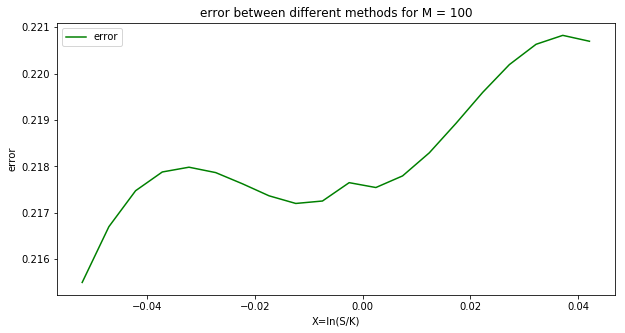

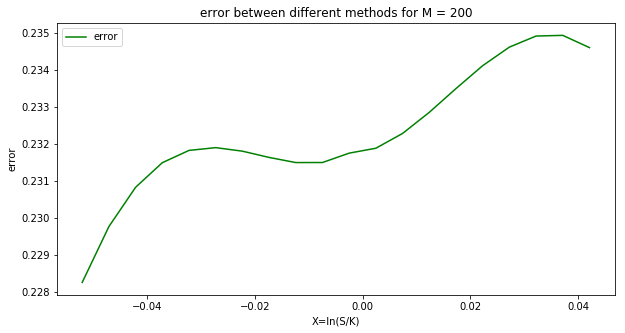

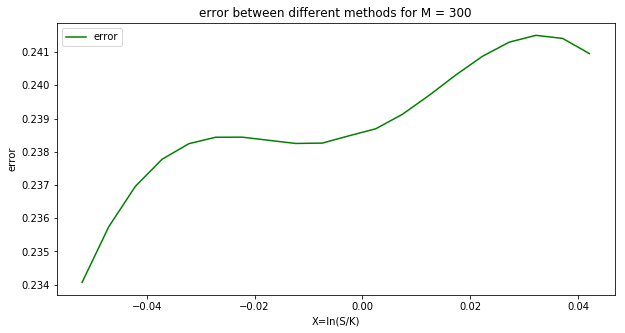

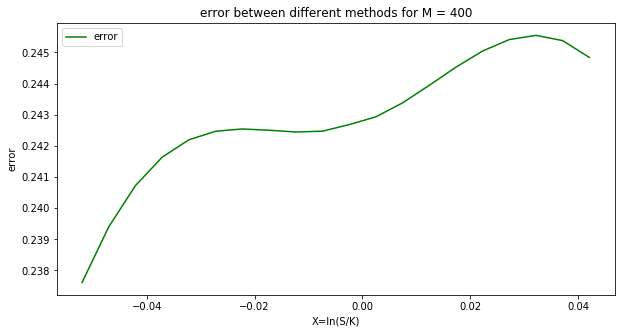

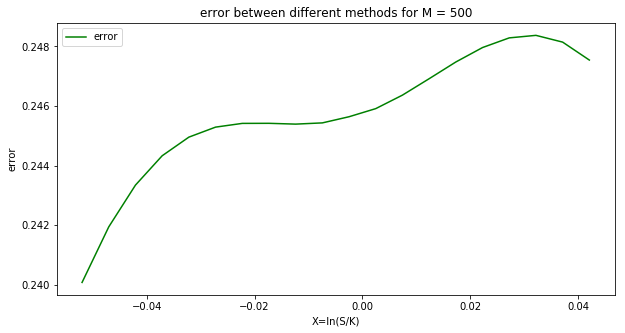

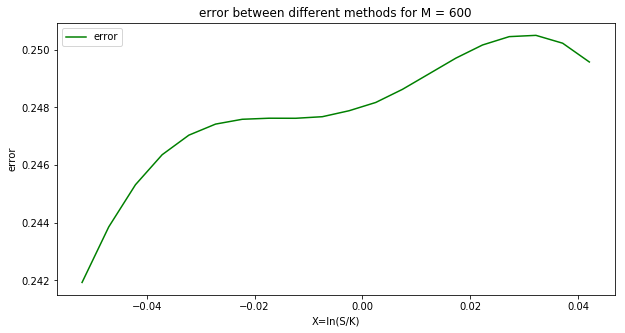

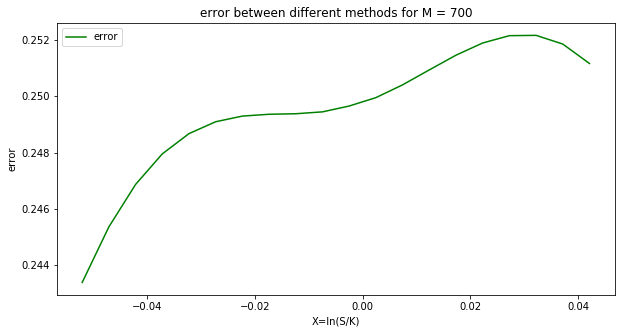

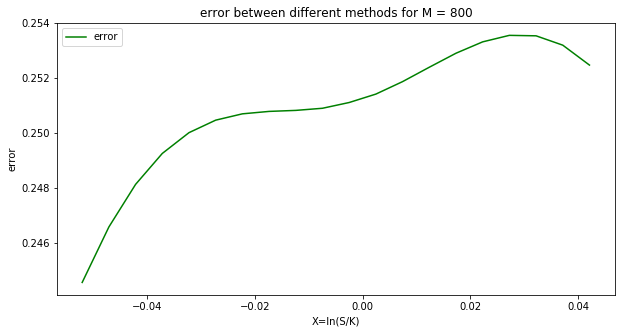

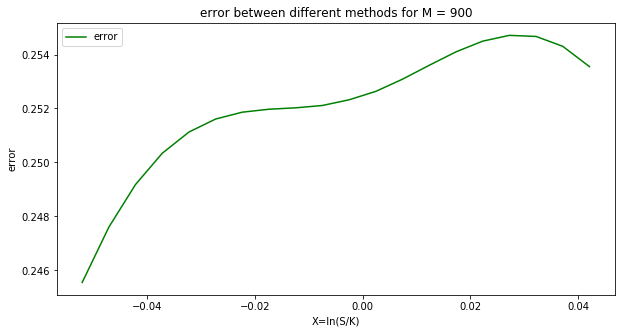

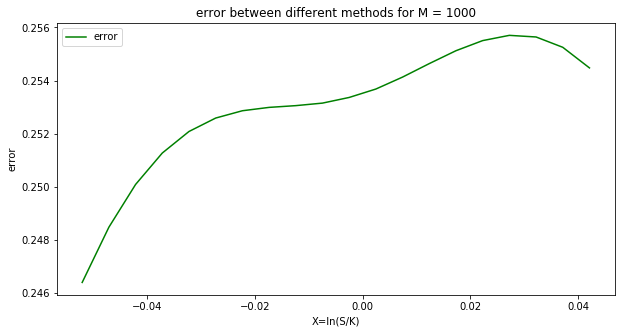

In [93]:
list_len=len(fdm_j_list[0])
x_list=[(i-list_len/2)*(0.5/list_len) for i in range(list_len)][40:60]
for i in range(10):
    plt.figure(figsize=(10,5))
    M=100+100*i
    title="error between different methods for M = "+str(M)
    plt.title(title)
    plt.plot(x_list,abs(np.array(fdm_j_list[i])-np.array(fdm_o_list[i]))[40:60],label='error',color='g')
    #plt.plot(x_list,[30:70],label='oksendal',color='r')
    plt.legend(loc='upper left')
    plt.ylabel('error')
    plt.xlabel('X=ln(S/K)')
plt.show()
    